# Import Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data-Set

In [117]:
df = pd.read_csv('amazon_ecommerce_2024_large.csv')

In [118]:
#Display the first few rows of the dataset
df.head()

,OrderID,ProductName,Category,Price,Quantity,CustomerID,OrderDate,DeliveryDate,Rating,Review,PaymentMethod,OrderStatus,ShippingCost,Discount,Warehouse,CustomerLocation
0,AMZ000001,Smartwatch,Home Appliances,316.85,3,CUST3575,2024-01-01 00:00:00,2024-01-02 00:00:00,1.0,Good,PayPal,Cancelled,21.32,8.96,Warehouse A,Urban
1,AMZ000002,Smartphone,Home Appliances,587.99,3,CUST8508,2024-01-01 00:01:00,2024-01-02 00:01:00,1.0,Poor,Debit Card,Returned,45.24,15.02,Warehouse C,Urban
2,AMZ000003,Smartwatch,NaN,1063.56,6,CUST2082,2024-01-01 00:02:00,2024-01-02 00:02:00,2.0,Excellent,Net Banking,Delivered,49.63,23.43,Warehouse C,Suburban
3,AMZ000004,Laptop,NaN,247.28,3,CUST3753,2024-01-01 00:03:00,2024-01-02 00:03:00,3.0,Average,Debit Card,Pending,43.79,14.31,Warehouse A,NaN
4,AMZ000005,Laptop,NaN,11.87,9,CUST3958,2024-01-01 00:04:00,2024-01-02 00:04:00,3.0,Poor,Net Banking,Returned,39.81,18.93,Warehouse A,Rural


# Understand the Data
  Shape and columns

In [119]:
df.shape

(10000, 16)

In [120]:
df.columns

Index(['OrderID', 'ProductName', 'Category', 'Price', 'Quantity', 'CustomerID',
       'OrderDate', 'DeliveryDate', 'Rating', 'Review', 'PaymentMethod',
       'OrderStatus', 'ShippingCost', 'Discount', 'Warehouse',
       'CustomerLocation'],
      dtype='object')

Summary Statistics

In [121]:
df.describe()

,Price,Quantity,Rating,ShippingCost,Discount
count,10000.000000,10000.000000,9519.000000,10000.000000,10000.000000
mean,1010.707639,5.018000,2.903561,24.960685,15.019667
std,575.030499,2.572069,1.202866,14.347552,8.681712
min,5.040000,1.000000,1.000000,0.020000,0.010000
25%,519.037500,3.000000,2.000000,12.420000,7.427500
50%,1011.515000,5.000000,3.000000,25.040000,15.180000
75%,1510.692500,7.000000,4.000000,37.272500,22.450000
max,1999.950000,9.000000,5.000000,50.000000,30.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderID           10000 non-null  object 
 1   ProductName       10000 non-null  object 
 2   Category          9000 non-null   object 
 3   Price             10000 non-null  float64
 4   Quantity          10000 non-null  int64  
 5   CustomerID        10000 non-null  object 
 6   OrderDate         10000 non-null  object 
 7   DeliveryDate      9000 non-null   object 
 8   Rating            9519 non-null   float64
 9   Review            9051 non-null   object 
 10  PaymentMethod     9000 non-null   object 
 11  OrderStatus       10000 non-null  object 
 12  ShippingCost      10000 non-null  float64
 13  Discount          10000 non-null  float64
 14  Warehouse         10000 non-null  object 
 15  CustomerLocation  9000 non-null   object 
dtypes: float64(4), int64(1), object(11)
memor

Check for Missing Values

In [123]:
df.isnull().sum()

OrderID                0
ProductName            0
Category            1000
Price                  0
Quantity               0
CustomerID             0
OrderDate              0
DeliveryDate        1000
Rating               481
Review               949
PaymentMethod       1000
OrderStatus            0
ShippingCost           0
Discount               0
Warehouse              0
CustomerLocation    1000
dtype: int64

In [124]:
df.isnull().sum().sum()

5430

Total 5430 null values in dataset

# Clean the Data

Handle the Missing Values

In [125]:
# Remove Rows with Missing Values
df = df.dropna(subset =['Category'])
df = df.dropna(subset =['PaymentMethod'])

In [126]:
# Missing Rating in Data-Set Fill with Mean Values
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [127]:
# Missing Review and CustomerLocation Fill With Other 
df['Review'].fillna('Other', inplace= True)
df['CustomerLocation'].fillna('Other', inplace= True)

In [128]:
# Convert columns to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'])

# Fill missing delivery_date with the next day's order_date
df['DeliveryDate'] = df['DeliveryDate'].fillna(df['OrderDate'] + pd.Timedelta(days=1))

In [129]:
df.head(5)

,OrderID,ProductName,Category,Price,Quantity,CustomerID,OrderDate,DeliveryDate,Rating,Review,PaymentMethod,OrderStatus,ShippingCost,Discount,Warehouse,CustomerLocation
0,AMZ000001,Smartwatch,Home Appliances,316.85,3,CUST3575,2024-01-01 00:00:00,2024-01-02 00:00:00,1.000000,Good,PayPal,Cancelled,21.32,8.96,Warehouse A,Urban
1,AMZ000002,Smartphone,Home Appliances,587.99,3,CUST8508,2024-01-01 00:01:00,2024-01-02 00:01:00,1.000000,Poor,Debit Card,Returned,45.24,15.02,Warehouse C,Urban
5,AMZ000006,Camera,Books,1835.01,5,CUST9735,2024-01-01 00:05:00,2024-01-02 00:05:00,4.000000,Excellent,Cash on Delivery,Pending,35.85,1.17,Warehouse A,Other
6,AMZ000007,Headphones,Fashion,613.20,6,CUST7833,2024-01-01 00:06:00,2024-01-02 00:06:00,1.000000,Average,Cash on Delivery,Pending,28.04,17.79,Warehouse A,Suburban
7,AMZ000008,Book,Electronics,446.89,6,CUST5314,2024-01-01 00:07:00,2024-01-02 00:07:00,2.900701,Good,Debit Card,Pending,39.34,6.93,Warehouse A,Urban


In [130]:
# Total Sum of Missing Values in Data-Set
df.isnull().sum().sum()

0

Zero Missing Values in Data Set

# Feature Engineering

Derived New Colums

Delivery Duration= (DeliveryDate - OrderDate) ;
Total Price= (Price * Quantity) ;
Discounted Price = (Price - Discount)

In [131]:
df['DeliveryDuration'] = (df['DeliveryDate'] - df['OrderDate']).dt.days
df['TotalPrice'] = (df ['Price']  - df['Quantity'])
df['DiscountedPrice'] = (df['Price'] - df['Discount'])

# Exploratory Data Analysis

Univariate Analysis

Distribution of Key Features

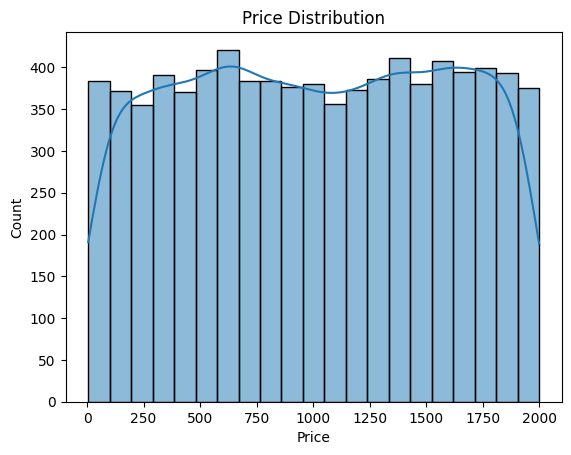

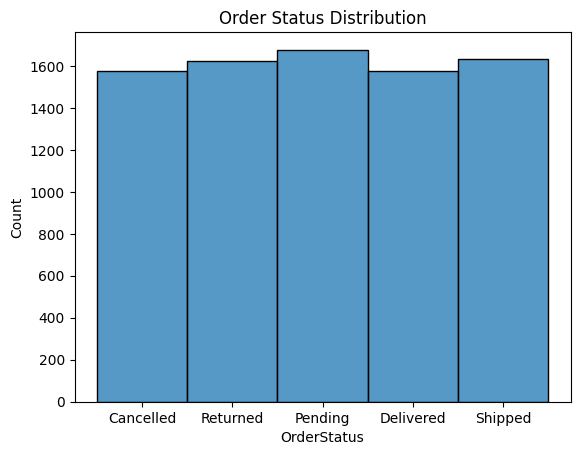

In [132]:
#Price Distribution
sns.histplot(df['Price'], kde = True)
plt.title('Price Distribution')
plt.show()

#Order Status Counts
sns.histplot(df['OrderStatus'])
plt.title('Order Status Distribution')
plt.show()

# Bivariate Analysis

Relation Between Features

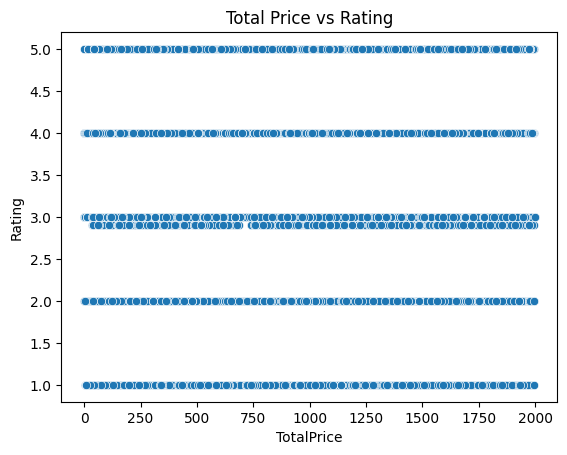

In [133]:
# TotalPrice vs Rating
sns.scatterplot(x= df['TotalPrice'], y = df['Rating'])
plt.title('Total Price vs Rating')
plt.show()

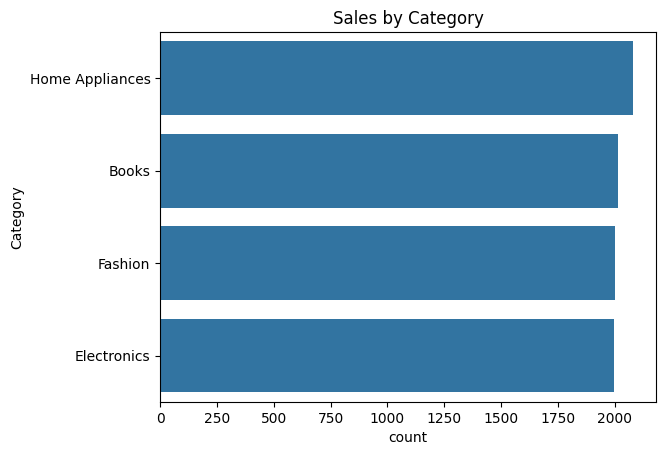

In [134]:
#Category Sales Count
sns.countplot(y = df['Category'], order = df['Category']. value_counts().index)
plt.title('Sales by Category')
plt.show()

# Times Series Analysis

Analyze sales trends ober time

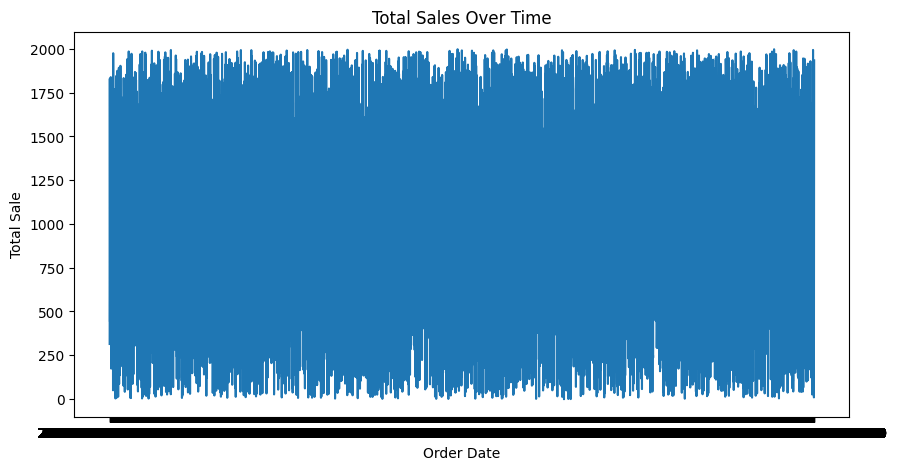

In [139]:
# Sales over Time
#df['OrderMonth'] = df['OrderDate'].dt.to_period('M')
sales_trend = df.groupby('OrderDate')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(sales_trend['OrderDate'].astype(str), sales_trend['TotalPrice'])
plt.xticks(rotation= 0)
plt.title('Total Sales Over Time')
plt.ylabel('Total Sale')
plt.xlabel('Order Date')
plt.show()

# Correaltion Analysis

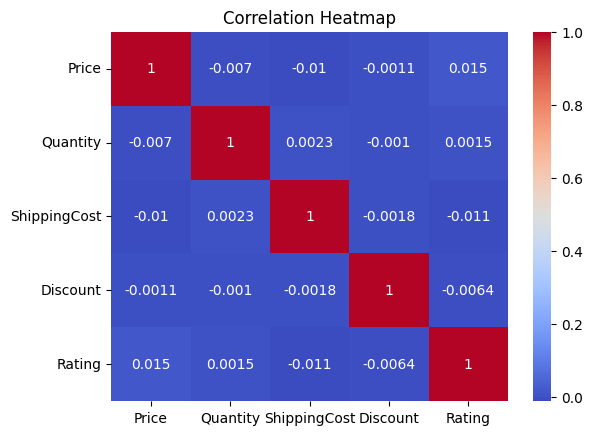

In [140]:
corr = df[['Price', 'Quantity', 'ShippingCost', 'Discount', 'Rating']].corr()
sns.heatmap(corr, annot=True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Customer Behavior Analysis

Analyze Purchasing Patterns by Customer Location, preferred Payment Method 

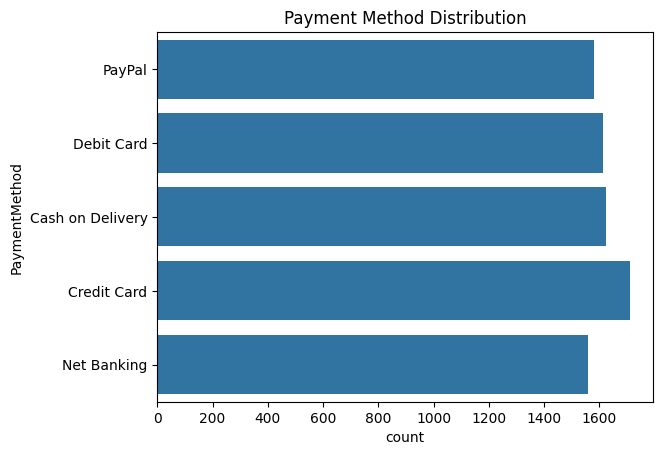

In [143]:
sns.countplot(y = df['PaymentMethod'])
plt.title('Payment Method Distribution')
plt.show()

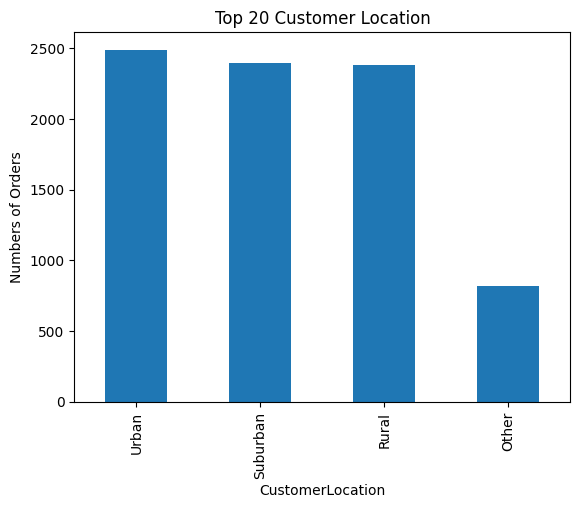

In [145]:
#Top 20 Customer Locations

top_locations = df['CustomerLocation'].value_counts().head(20)
top_locations.plot(kind = 'bar')
plt.title('Top 20 Customer Location')
plt.ylabel('Numbers of Orders')
plt.show()

# Summary

The Most Popular Catrgory (by order count) are Home Appliances : 2299 Orders ; Fashion: 2255 Order ; Books: 2243 Orders ; Electronics: 2203 Orders.
The Average Delivery Time is 1 days, Indicating efficient Logistics.
Most of Customer preferred payment using Credit Card. There are 2500 customer from Urban Locations.